# Box_Cox Transformation

The Box-Cox transformation is a family of power transformations that is used to stabilize variance and make data more closely approximate a normal distribution. The transformation is defined as:

$$if (\lambda\neq 0): \quad (\lambda) = \frac{x^\lambda - 1}{\lambda}$$
$$if (\lambda = 0): \quad y(\lambda) = \ln(x)$$

Where:
$x$ is the input data.
$\lambda$ (lambda) is the transformation parameter.

Purpose and Applications

Variance Stabilization: Box-Cox helps in making the variance of the data more consistent across different levels of the independent variable.
Normalization: It can transform skewed data into a more normal distribution, which is often a requirement for many statistical models.
Improving Model Performance: In regression models, applying the Box-Cox transformation can often improve model performance by making the relationship between the variables more linear and stabilizing variance.
The optimal value of ($\lambda$) can be estimated by maximum likelihood estimation, and typically, a range of values is tested to find the best fit for the given dataset. When ($\lambda$ = 0), the transformation reduces to a logarithmic transformation, which is useful for handling exponential growth or data with high positive skew.

#### Import necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

#### Load data

In [3]:
curr_wd = os.getcwd()
parent_dir = os.path.dirname(curr_wd)
data_path = os.path.join(parent_dir + '/data/price_data.csv')

data_all = pd.read_csv(data_path,index_col='date', parse_dates=True)
data_all.index = pd.to_datetime(data_all.index, format="%m/%d/%Y")
data_price = data_all['price']

print(data_price.head(5))

date
2000-01-03    652.927098
2000-01-04    651.943573
2000-01-05    565.203798
2000-01-06    543.506067
2000-01-07    538.444125
Name: price, dtype: float64


#### Visualize original data

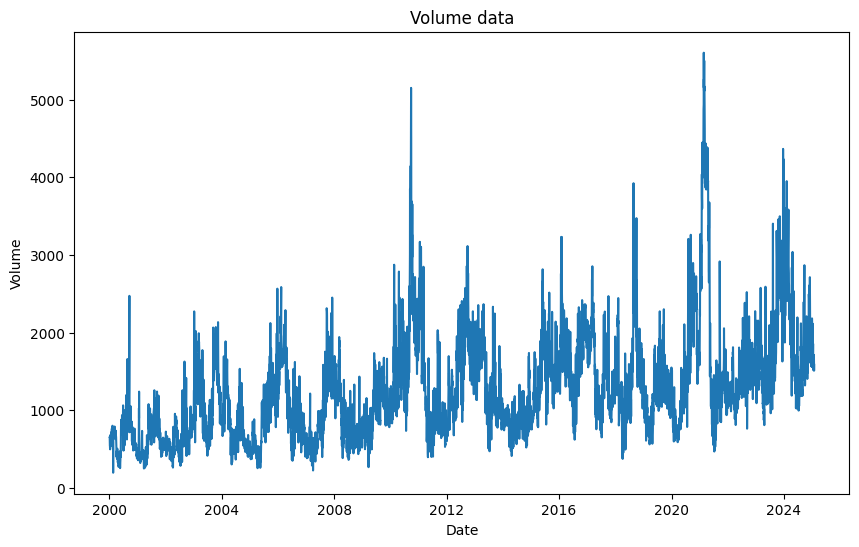

In [4]:
plt.figure(figsize=(10,6))
plt.plot(data_price.index, data_price)
plt.title('Volume data')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

#### Perform box_cox transformation for different $\lambda$ values

In [5]:
lambdas = np.linspace(-3, 3,15)
transformed_data = []
for lam in lambdas:
    if lam == 0:
        transformed_data.append(np.log(data_price))  # Log transformation when lambda=0
    else:
        transformed_data.append((data_price**lam - 1) / lam)

print(transformed_data[:1])

[date
2000-01-03    0.333333
2000-01-04    0.333333
2000-01-05    0.333333
2000-01-06    0.333333
2000-01-07    0.333333
                ...   
2025-01-23    0.333333
2025-01-24    0.333333
2025-01-25    0.333333
2025-01-27    0.333333
2025-01-28    0.333333
Name: price, Length: 7646, dtype: float64]


#### Visualizing the results of different $\lambda$ values

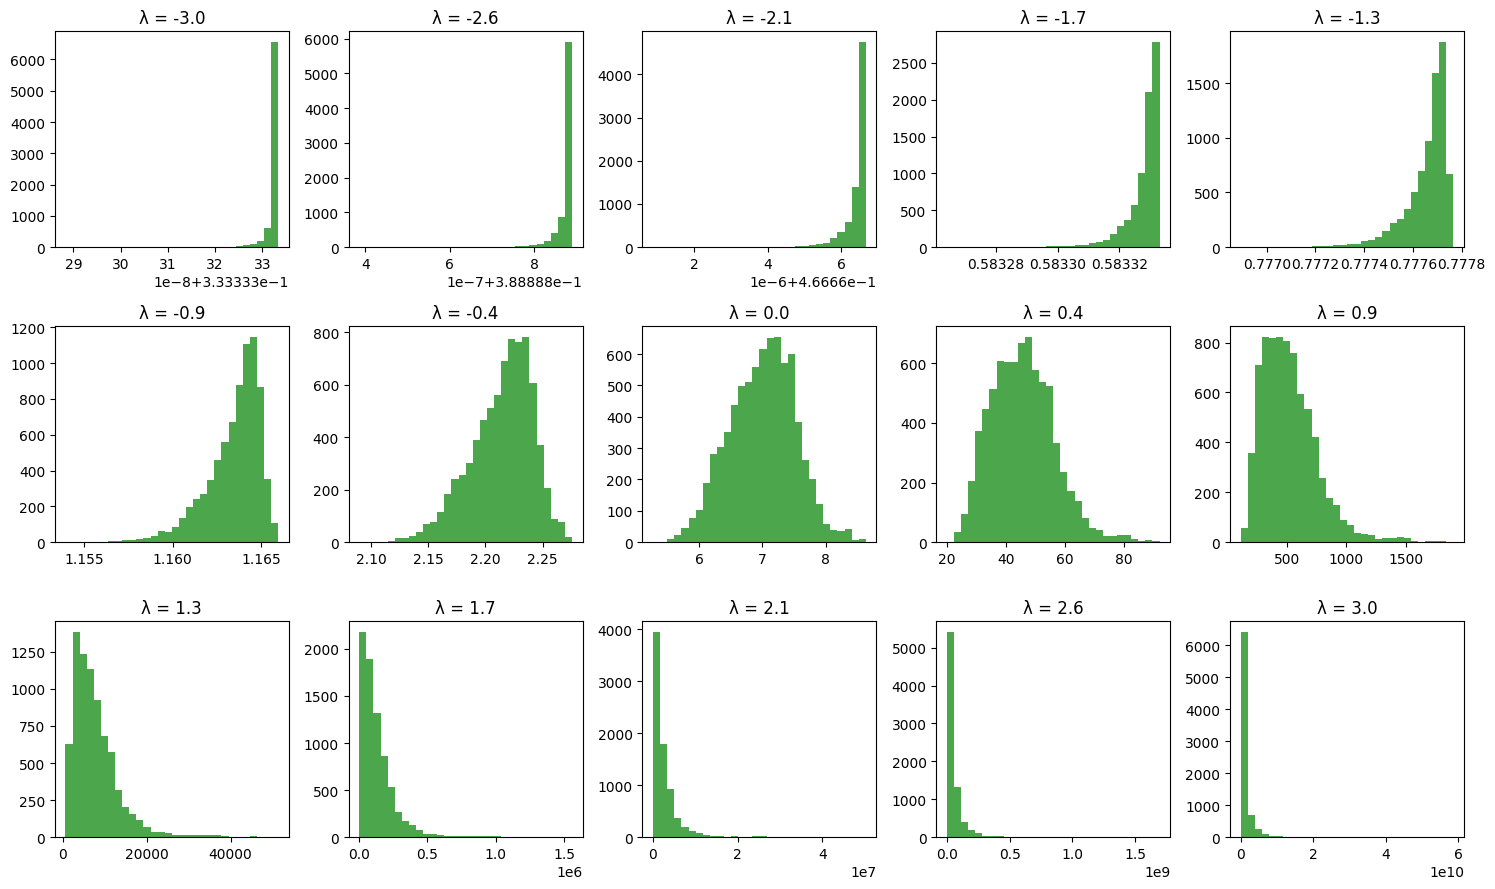

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, data in enumerate(transformed_data):
    ax = axes[i]
    ax.hist(data, bins=30, color='green', alpha=0.7)
    ax.set_title(f"λ = {lambdas[i]:.1f}")

# Remove empty subplots if lambdas don't fill all 15 slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Finding the best lambda value with `scipy.stats.boxcox` library

In [7]:
data_transformed, best_lambda = boxcox(data_price)
print(f"Best lambda found: {best_lambda:.4f}")

Best lambda found: 0.0534


#### Visualizing the best transformed data

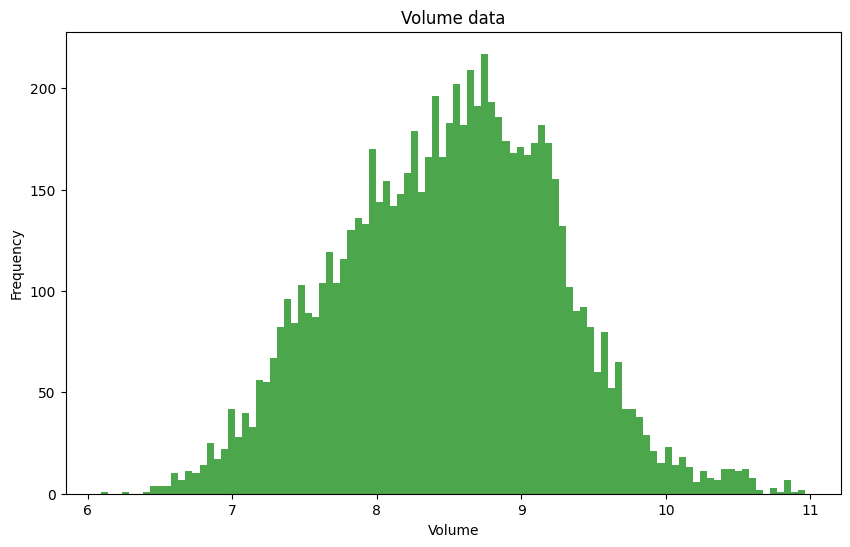

In [8]:
best_transformed_data = (data_price**best_lambda - 1) / best_lambda

plt.figure(figsize=(10,6))
plt.hist(best_transformed_data, bins=100, color='green', alpha=0.7)
plt.title('Volume data')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()
    